In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score





In [6]:

df= pd.read_csv( 'Merged_Greenhouse_Weather.csv')

<ipython-input-6-c9c065674b25>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,18,20,22,23,25,27,29,31,33,35,37,39,41,43,44,45,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv( 'Merged_Greenhouse_Weather.csv')


In [7]:
df.columns

Index(['%time', 'AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC',
       'EnScr', 'HumDef', 'PipeGrow', 'PipeLow', 'Rhair', 'Tair', 'Tot_PAR',
       'Tot_PAR_Lamps', 'VentLee', 'Ventwind', 'assim_sp', 'assim_vip',
       'co2_dos', 'co2_sp', 'co2_vip', 'dx_sp', 'dx_vip', 'int_blue_sp',
       'int_blue_vip', 'int_farred_sp', 'int_farred_vip', 'int_red_sp',
       'int_red_vip', 'int_white_sp', 'int_white_vip', 'pH_drain_PC',
       'scr_blck_sp', 'scr_blck_vip', 'scr_enrg_sp', 'scr_enrg_vip',
       't_grow_min_sp', 't_grow_min_vip', 't_heat_sp', 't_heat_vip',
       't_rail_min_sp', 't_rail_min_vip', 't_vent_sp', 't_ventlee_vip',
       't_ventwind_vip', 'water_sup', 'water_sup_intervals_sp_min',
       'water_sup_intervals_vip_min', 'window_pos_lee_sp',
       'window_pos_lee_vip', 'AbsHumOut', 'Iglob', 'PARout', 'Pyrgeo',
       'RadSum', 'Rain', 'Rhout', 'Tout', 'Winddir', 'Windsp'],
      dtype='object')

In [ ]:
#dfdata = [
'%time',
'Tair',  # Internal air temperature (target)
'Tout',  # External temperature
'Rhair',  # Internal relative humidity
'Rhout',  # External relative humidity
't_ventlee_vip',
't_ventwind_vip',
'PARout',
'Tot_PAR',
'Iglob',
'HumDef',
'VentLee',
'PipeLow',
#]

In [8]:
#df = df[dfdata]
df.head()

,%time,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,...,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
0,43815.00000,100,35,509,31.6,0.3,96,8.8,0.0,49.9,...,6.220954,0.0,0.0,-72.0,215.0,0.0,80.6,6.9,32.0,4.7
1,43815.00347,100,85,484,31.8,0.3,96,9.2,0.0,48.5,...,6.220954,0.0,0.0,-73.0,0.0,0.0,80.6,6.9,32.0,4.7
2,43815.00694,100,96,475,31.8,0.3,96,9.1,0.0,46.8,...,6.205565,0.0,0.0,-76.0,0.0,0.0,80.4,6.9,32.0,4.7
3,43815.01042,100,96,501,32.0,0.3,96,8.5,0.0,45.2,...,6.190173,0.0,0.0,-77.0,0.0,0.0,80.2,6.9,32.0,4.7
4,43815.01389,100,96,487,32.0,0.3,96,8.5,0.0,43.8,...,6.162624,0.0,0.0,-75.0,0.0,0.0,80.9,6.7,32.0,4.7


In [9]:
features = [
    'HumDef',
    't_ventlee_vip',
    'Tair',

]

In [10]:
# Initialize dictionaries and lists
numeric_data = {}
valid_features = []

In [11]:
for feature in features:
    numeric_data[feature] = pd.to_numeric(df[feature], errors='coerce')
    if not numeric_data[feature].isna().all():
        valid_features.append(feature)

In [12]:
X = pd.DataFrame({feature: numeric_data[feature] for feature in valid_features})

In [13]:
# Print removed features
removed_features = set(features) - set(valid_features)
if removed_features:
    print("Removed features with all missing values:", removed_features)

In [14]:
X = X.fillna(X.median())

In [15]:
y = pd.to_numeric(df['Rhair'], errors='coerce')
y = y.fillna(y.median())

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=valid_features)

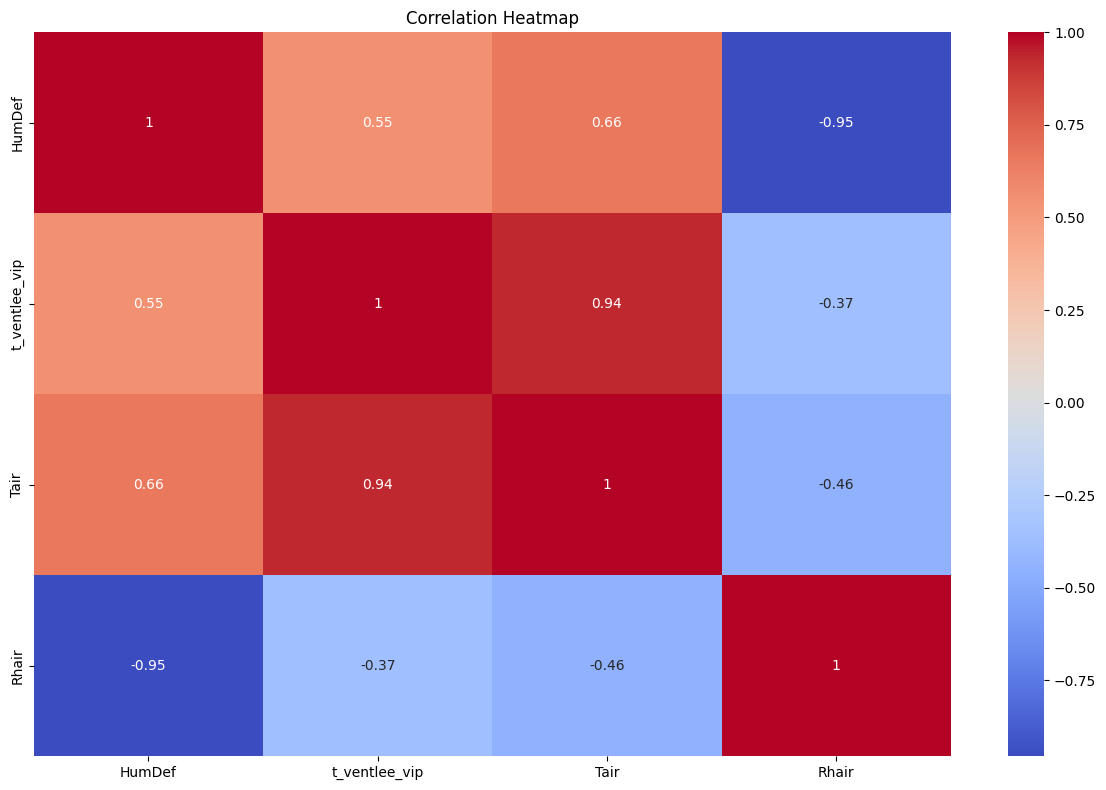

In [17]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[valid_features + ['Rhair']].apply(pd.to_numeric, errors='coerce').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [18]:
print(df[features].dtypes)


HumDef           object
t_ventlee_vip    object
Tair             object
dtype: object


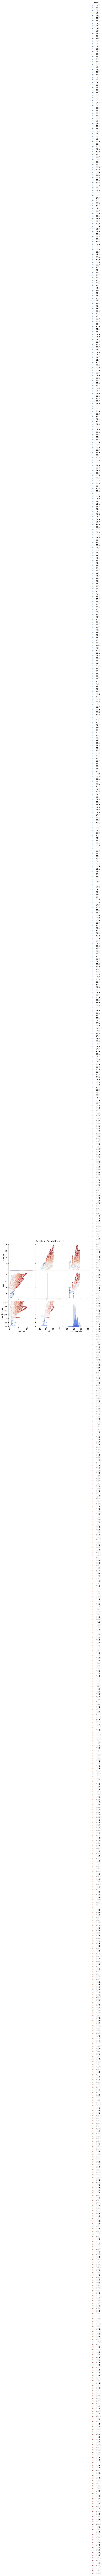

In [ ]:
sns.pairplot(df, vars=features, hue='Rhair', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [27]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [28]:
rf_model = RandomForestRegressor(
    n_estimators=10,     # Reduced from 100 to 20 trees
    max_depth=3,         # Limited tree depth to 5 levels
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=42)

In [29]:
print("NaNs in X_test:", pd.DataFrame(X_test).isnull().sum().sum())
print("NaNs in y_test:", pd.Series(y_test).isnull().sum())


NaNs in X_test: 0
NaNs in y_test: 0


In [30]:
y_pred = rf_model.predict(X_test)

In [31]:


mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 7.88
Root Mean Squared Error: 2.81
R² Score: 0.91


In [32]:
scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = (-scores) ** 0.5

print("Cross-validation RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())



Cross-validation RMSE scores: [4.9165547  1.53811855 1.83696566 2.96491915 6.8066995 ]
Mean RMSE: 3.612651512912792


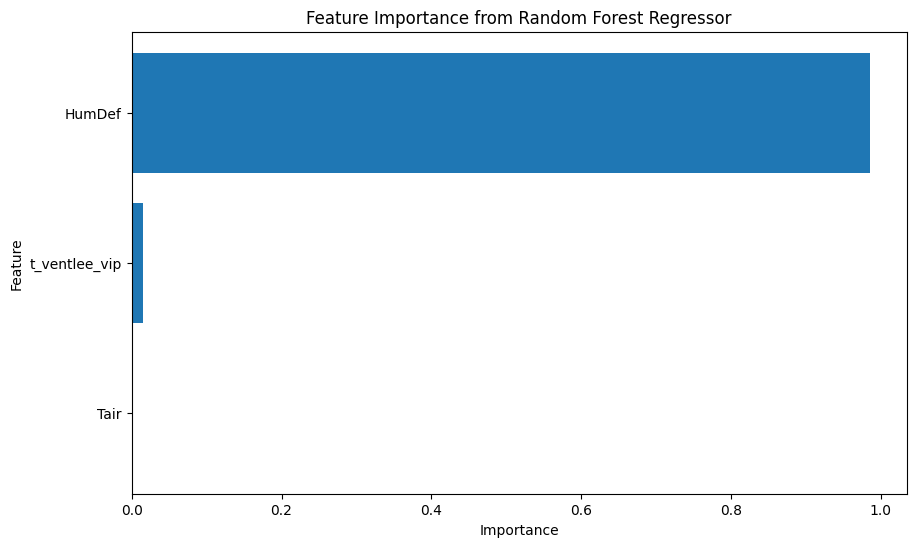

In [33]:
feature_importances = pd.DataFrame({'Feature': valid_features, 'Importance': rf_model.feature_importances_}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Regressor')
plt.gca().invert_yaxis()
plt.show()

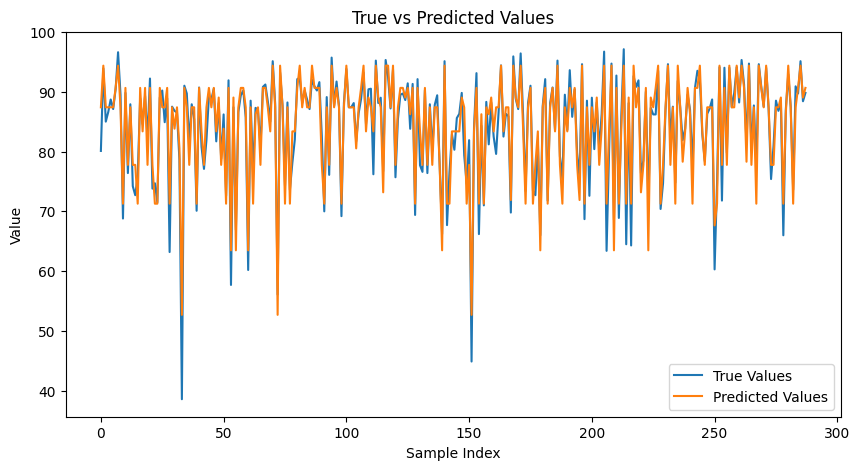

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values.flatten()[:288], label='True Values') # Convert to NumPy array and then flatten
plt.plot(y_pred.flatten()[:288], label='Predicted Values') # Convert to NumPy array and then flatten
plt.xlabel('Sample Index')
plt.title('True vs Predicted Values')
plt.ylabel('Value')
plt.legend()
plt.show()